In [83]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [84]:
df = pd.read_csv("Walmart.csv")

In [85]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [86]:
print("Number of Rows:", df.shape[0], ", Number of Columns:", df.shape[1])

Number of Rows: 6435 , Number of Columns: 8


In [87]:
#Checking null values
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [88]:
#checking Statistics of Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


In [89]:
#Checking Data types
df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

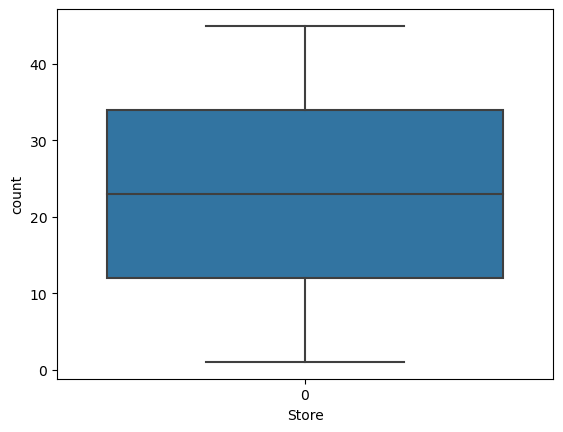

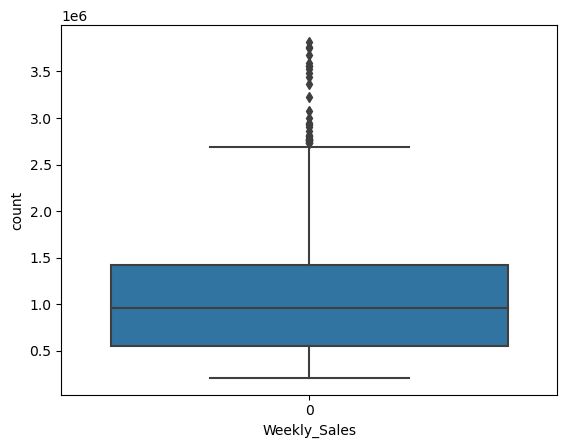

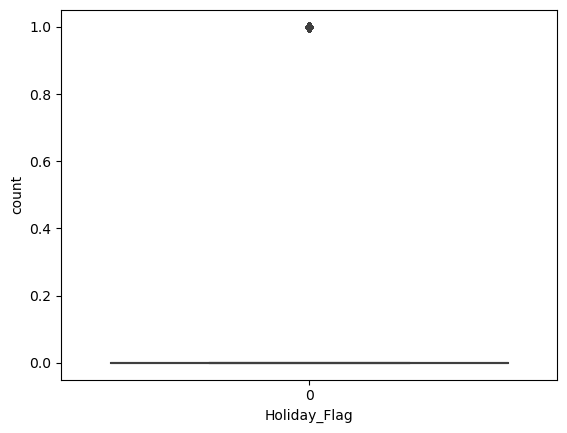

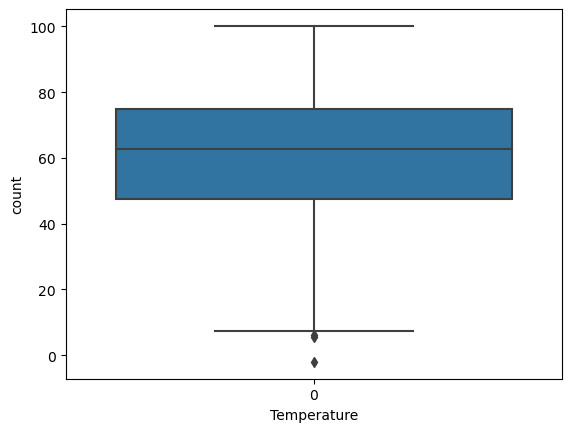

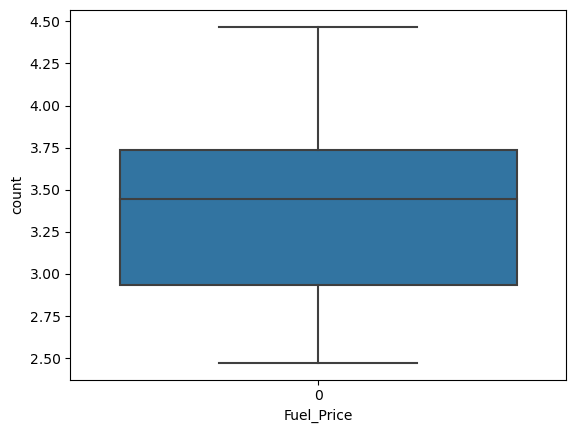

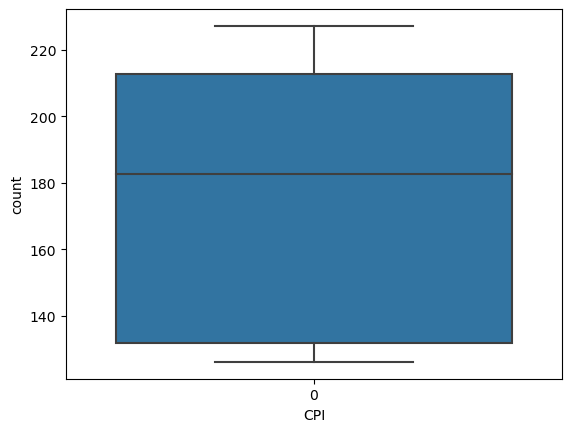

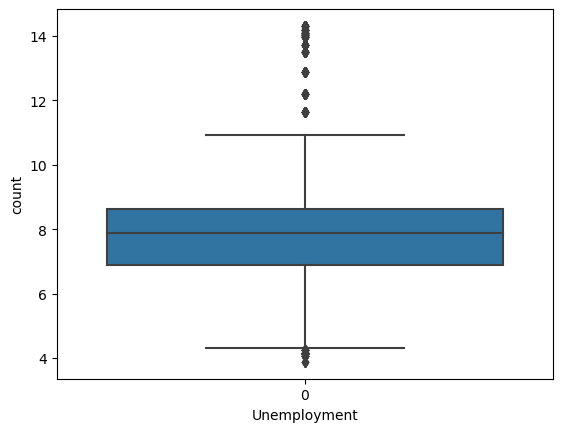

In [90]:
# Outlier Detection
for i in df.columns:
    if((df[i].dtype == 'int64') or (df[i].dtype == 'float64')):
        sns.boxplot(df[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [91]:
# We will not remove outliers majorly Sales and Unemployment having outliers but we need them aswell

In [92]:
No_of_stores = df['Store'].nunique()

In [93]:
No_of_stores

45

# Analyzing Sales by Stores

### Looking to the Graph 4 & 20 has higher amount of sales and lower is 33

In [94]:
sales_by_stores = df.groupby('Store')['Weekly_Sales'].sum()

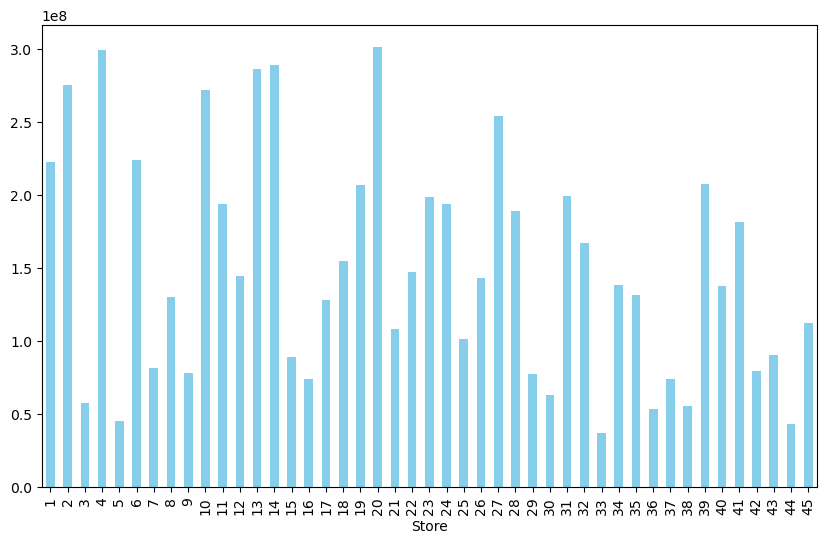

In [95]:
#Plotting the bar graph
sales_by_stores.plot(kind='bar', figsize=(10,6), color = 'skyblue')
plt.show()

In [96]:
# Converting date time format and setting up index 
df['Date'] = pd.to_datetime(df['Date'])

In [97]:
df.dtypes

Store                    int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday_Flag             int64
Temperature            float64
Fuel_Price             float64
CPI                    float64
Unemployment           float64
dtype: object

In [98]:
df['Year'] = df['Date'].dt.year

In [99]:
# Group by year and calculate sum of Weekly_Sales
sales_yearly = df.groupby('Year')['Weekly_Sales'].sum()


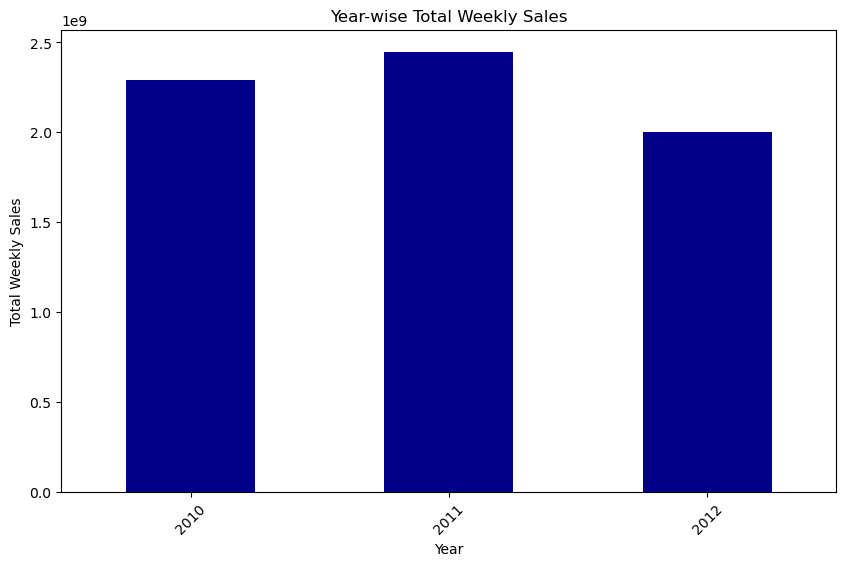

In [100]:
# Plotting
sales_yearly.plot(kind='bar', figsize=(10, 6), color='darkblue')
plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.title('Year-wise Total Weekly Sales')
plt.xticks(rotation=45)
plt.show()

In [101]:

df.set_index('Date', inplace=True)

In [102]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year
Date,,,,,,,,
2010-05-02,1,1643690.90,0,42.31,2.572,211.096358,8.106,2010
2010-12-02,1,1641957.44,1,38.51,2.548,211.242170,8.106,2010
2010-02-19,1,1611968.17,0,39.93,2.514,211.289143,8.106,2010
2010-02-26,1,1409727.59,0,46.63,2.561,211.319643,8.106,2010
2010-05-03,1,1554806.68,0,46.50,2.625,211.350143,8.106,2010
...,...,...,...,...,...,...,...,...
2012-09-28,45,713173.95,0,64.88,3.997,192.013558,8.684,2012
2012-05-10,45,733455.07,0,64.89,3.985,192.170412,8.667,2012
2012-12-10,45,734464.36,0,54.47,4.000,192.327265,8.667,2012


In [103]:
# Step 3: Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

In [104]:
train.shape

(5148, 8)

In [105]:
test.shape

(1287, 8)

In [106]:
model = ARIMA(train['Weekly_Sales'], order=(1,1,1))

In [107]:
model_fit = model.fit()

In [108]:
# Step 7: Forecast
forecast = model_fit.forecast(steps=12)


In [109]:
# Print forecast for next 12 months
print(forecast)

5148    279336.047953
5149    281063.515640
5150    281499.371111
5151    281609.341325
5152    281637.087788
5153    281644.088468
5154    281645.854802
5155    281646.300464
5156    281646.412908
5157    281646.441279
5158    281646.448437
5159    281646.450243
Name: predicted_mean, dtype: float64


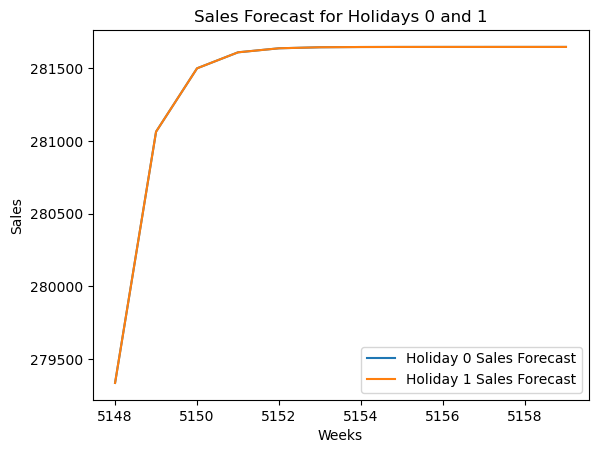

In [110]:
# Predict sales for holiday 0
forecast_holiday_0 = model_fit.forecast(steps=12)  # Adjust the number of steps as needed
plt.plot(forecast_holiday_0, label='Holiday 0 Sales Forecast')

# Predict sales for holiday 1
# Assuming holiday weeks are identified in the dataset and are consecutive
forecast_holiday_1 = model_fit.forecast(steps=12)  # Adjust the number of steps as needed
plt.plot(forecast_holiday_1, label='Holiday 1 Sales Forecast')

plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Sales Forecast for Holidays 0 and 1')
plt.legend()
plt.show()

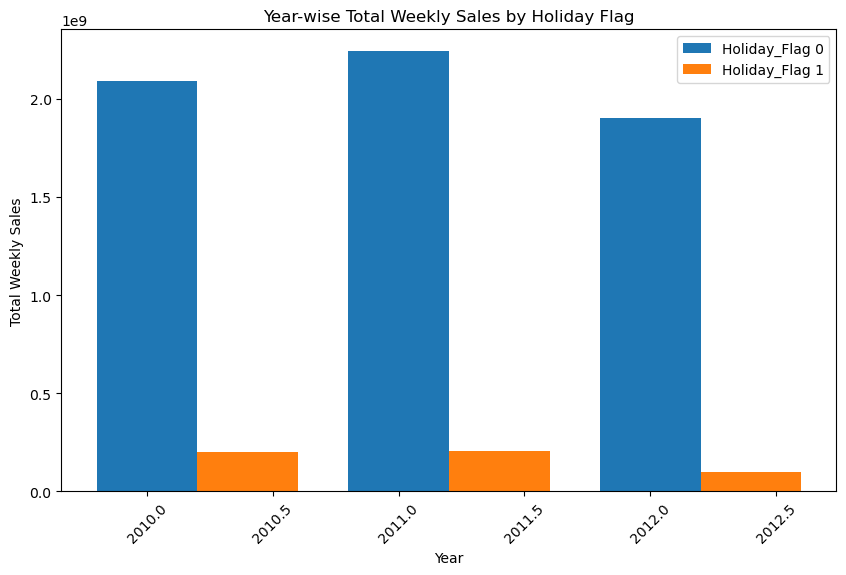

In [111]:
# Filter data for holiday flag 0 and 1 separately
sales_holiday_0 = df[df['Holiday_Flag'] == 0]
sales_holiday_1 = df[df['Holiday_Flag'] == 1]

# Group by year and calculate sum of Weekly_Sales for holiday flag 0
sales_holiday_0_yearly = sales_holiday_0.groupby('Year')['Weekly_Sales'].sum()

# Group by year and calculate sum of Weekly_Sales for holiday flag 1
sales_holiday_1_yearly = sales_holiday_1.groupby('Year')['Weekly_Sales'].sum()

# Plotting
plt.figure(figsize=(10, 6))

plt.bar(sales_holiday_0_yearly.index, sales_holiday_0_yearly.values, width=0.4, align='center', label='Holiday_Flag 0')
plt.bar(sales_holiday_1_yearly.index + 0.4, sales_holiday_1_yearly.values, width=0.4, align='center', label='Holiday_Flag 1')

plt.xlabel('Year')
plt.ylabel('Total Weekly Sales')
plt.title('Year-wise Total Weekly Sales by Holiday Flag')
plt.legend()
plt.xticks(rotation=45)
plt.show()